# CÂU 3. MONTHLY ONTHLY CHAMPAGNE SALES MILLIONS

**Cho dữ liệu champagne_new.xlsx là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972**  

**Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán Time Series thích hợp để thực hiện việc dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973 giá trị dựa trên các thông tin được cung cấp**

1. Thực hiện Decomposition, trực quan hóa, nhận xét.  
2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu. 
3. Áp dụng thuật toán phù hợp.  
4. Tìm kết quả. 
5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months) như gợi ý

## Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/champagne_new.csv", index_col=0)
df.head()

,monthly_champange
Month,
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1964-01 to 1972-09
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [5]:
df.index = pd.to_datetime(df.index)

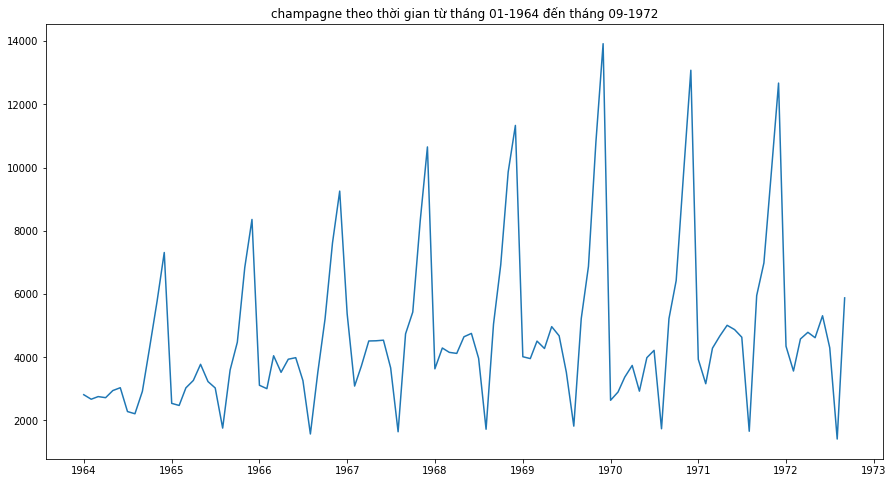

In [6]:
plt.figure(figsize=(15,8))
plt.plot(df)
plt.title("champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972")
plt.show()

## 1. Thực hiện Decomposition, trực quan hóa, nhận xét.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result

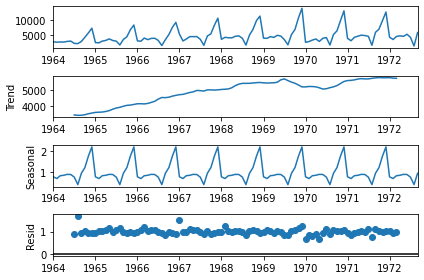

In [8]:
result.plot()
plt.show()

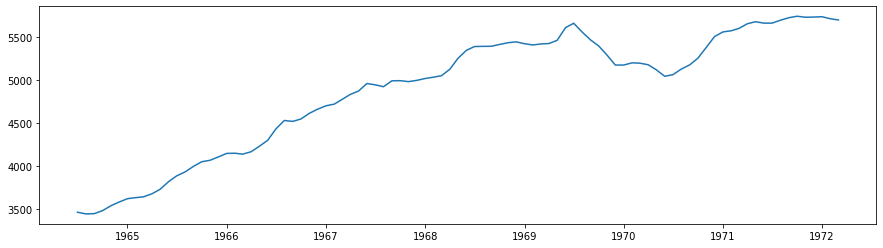

In [9]:
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

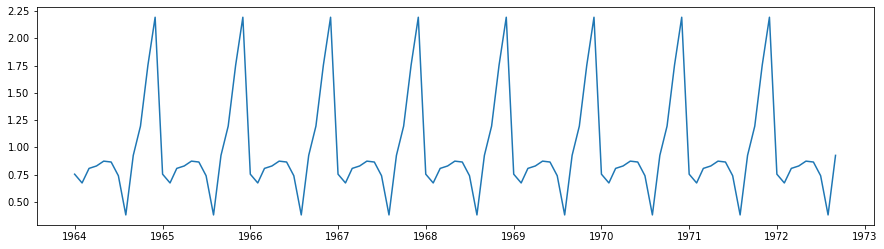

In [10]:
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

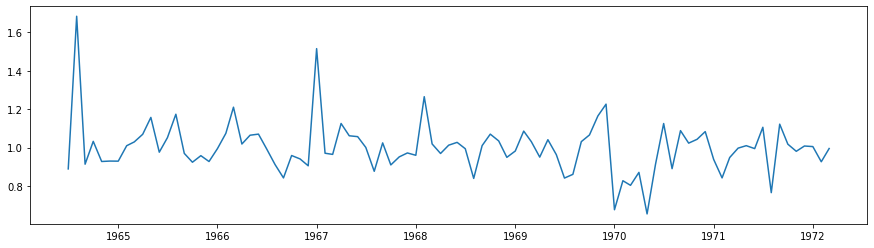

In [11]:
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

**Nhận xét:**
* Với kết quả trên, ta có thể thấy rõ tính seasonal component của data, và cũng có thể thấy xu hướng dữ liệu ở trên được tách riêng.
* Trend có thể lên hoặc xuống và có thể tuyến tính hoặc phi tuyến tính. Cần phải hiểu tập dữ liệu để biết liệu một khoảng thời gian đáng kể đã trôi qua có thể xác định xu hướng thực tế hay chưa.
* Cũng có thể có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu nhiên và không thể đoán trước

## 2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.

In [108]:
length = df.shape[0]
train_set_len = int(round(0.75*length,0))

In [109]:
train_set = df.iloc[:train_set_len,:]
train_set

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927


In [110]:
test_set = df.iloc[train_set_len:,:]
test_set

,monthly_champange
Month,
1970-08-01,1738
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676


## 3. Áp dụng thuật toán

### 3.1 Sử dụng thuật toán ARIMA

In [111]:
from pmdarima import auto_arima

In [16]:
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1486.804, Time=2.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.61 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=1.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1486.124, Time=1.46 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.50 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1486.780, Time=13.99 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=1.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=9.65 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=19.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.83 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1487.125, Time=2.35 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1487.101, Time=2.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.20 sec
 ARIMA(0,1,2)(1,1,0)[1

In [112]:
print(stepwise_model.aic())

1079.6531807938982


In [113]:
stepwise_model.fit(train_set)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

### 3.2 Sử dụng thuật toán Holtwinters

In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [115]:
holt_model = ExponentialSmoothing(df, seasonal='mul', 
                             seasonal_periods=12).fit()

## 4. Tìm kết quả

### 4.1. Dự đoán kết quả trên Test set

#### 4.1.1. ARIMA model

In [116]:
future_forecast = stepwise_model.predict(n_periods=len(test_set))
future_forecast

array([ 1940.04735035,  5225.17885869,  6870.88240787, 10715.67121493,
       13693.3207692 ,  2740.77227492,  2974.59175132,  3452.302409  ,
        3772.80813158,  3083.12935196,  4031.50858661,  4149.01993707,
        1919.17962416,  5213.80554111,  6859.86114671, 10711.71420683,
       13700.45454607,  2721.32008921,  2957.28483049,  3434.44560848,
        3759.00695411,  3059.2230793 ,  4016.66671795,  4143.47747045,
        1909.77671368,  5203.6246469 ])

In [117]:
future_forecast = pd.DataFrame(future_forecast,index = test_set.index,columns=['Prediction'])
future_forecast

,Prediction
Month,
1970-08-01,1940.047350
1970-09-01,5225.178859
1970-10-01,6870.882408
1970-11-01,10715.671215
1970-12-01,13693.320769
1971-01-01,2740.772275
1971-02-01,2974.591751
1971-03-01,3452.302409
1971-04-01,3772.808132


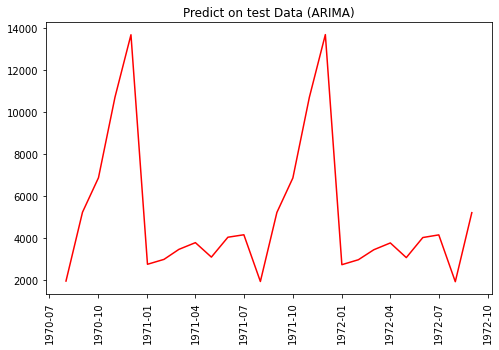

In [118]:
plt.figure(figsize=(8,5))
plt.plot(future_forecast, color='red')
plt.xticks(rotation='vertical')
plt.title("Predict on test Data (ARIMA)")
plt.show()

In [119]:
# mea, mse của ARIMA model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_set,future_forecast)
print('Mean Absolute Error', mae)

mse = mean_squared_error(test_set,future_forecast)
print('Mean Square Error: ', mse)

Mean Absolute Error 773.3991217154514
Mean Square Error:  832700.8094307727


#### 4.1.2. HoltWinters model

In [120]:
holt_pred = holt_model.predict(start=test_set.index[0], 
                     end=test_set.index[-1])
holt_pred

1970-08-01     1713.024020
1970-09-01     4750.381993
1970-10-01     6349.351061
1970-11-01     9460.094279
1970-12-01    11648.940710
1971-01-01     3525.644391
1971-02-01     3828.935740
1971-03-01     4125.478530
1971-04-01     4378.771367
1971-05-01     4342.179204
1971-06-01     5230.798229
1971-07-01     4554.853615
1971-08-01     1985.113338
1971-09-01     5358.387316
1971-10-01     6936.841694
1971-11-01    10439.610945
1971-12-01    12864.137823
1972-01-01     3711.155113
1972-02-01     3628.504343
1972-03-01     4523.536844
1972-04-01     4814.953460
1972-05-01     4822.535681
1972-06-01     4971.421380
1972-07-01     4698.363134
1972-08-01     1828.905422
1972-09-01     5421.668964
Freq: MS, dtype: float64

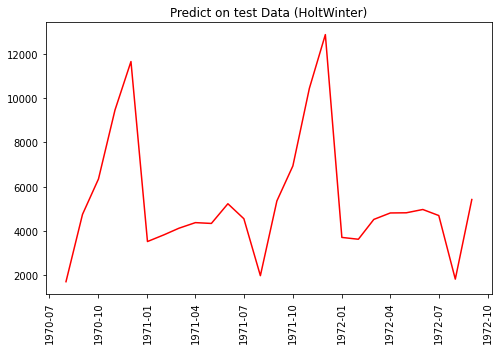

In [121]:
plt.figure(figsize=(8,5))
plt.plot(holt_pred.index, holt_pred.values, color='red')
plt.xticks(rotation='vertical')
plt.title("Predict on test Data (HoltWinter)")
plt.show()

In [122]:
# mea, mse của HoltWinters model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_set,holt_pred)
print('Mean Absolute Error', mae)

mse = mean_squared_error(test_set,holt_pred)
print('Mean Square Error: ', mse)

Mean Absolute Error 359.9664473988811
Mean Square Error:  218095.2219982324


### 4.2. Dự đoán kết quả trong 9 tháng tiếp theo

#### 4.2.1. ARIMA model

In [123]:
future_forecast_all = stepwise_model.predict(n_periods=len(test_set)+9)  # time of test set + 9 months
arima_predict_next_9_m = future_forecast_all[len(test_set):]
#len(arima_predict_next_9_m)

In [124]:
months = pd.date_range('1972-10-01','1973-06-01', 
              freq='MS').strftime("%Y-%m").tolist()

months

['1972-10',
 '1972-11',
 '1972-12',
 '1973-01',
 '1973-02',
 '1973-03',
 '1973-04',
 '1973-05',
 '1973-06']

In [125]:
arima_predict_next_9_m = pd.DataFrame(future_forecast_9_next, index= months, columns=['Predict_next_9_months'])
arima_predict_next_9_m.index = pd.to_datetime(future_forecast_9_next.index)
arima_predict_next_9_m

,Predict_next_9_months
1972-10-01,6849.651405
1972-11-01,10700.925611
1972-12-01,13688.757157
1973-01-01,2711.801188
1973-02-01,2947.590143
1973-03-01,3424.795979
1973-04-01,3749.025002
1973-05-01,3050.069151
1973-06-01,4006.770041


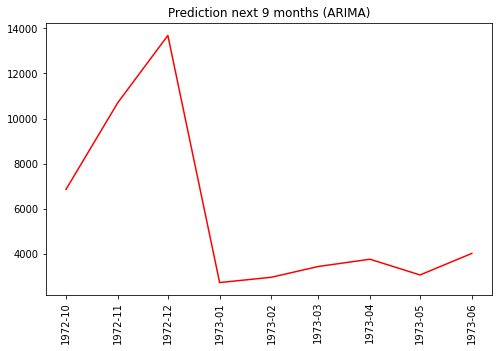

In [126]:
plt.figure(figsize=(8,5))
plt.plot(arima_predict_next_9_m, color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months (ARIMA)")
plt.show()

#### 4.2.2. HoltWinters model

In [127]:
import datetime
s = datetime.datetime(1972, 10, 1)
e = datetime.datetime(1973, 6, 1)
pred_next_9_month = holt_model.predict(start= s, end=e)
pred_next_9_month

holt_predict_next_9_m = pd.DataFrame(pred_next_9_month, columns=['Predict_next_9_months'])
holt_predict_next_9_m

,Predict_next_9_months
1972-10-01,6668.659272
1972-11-01,9752.678007
1972-12-01,12465.547709
1973-01-01,3898.294696
1973-02-01,3338.055681
1973-03-01,4238.553237
1973-04-01,4461.262998
1973-05-01,4407.632265
1973-06-01,4826.756922


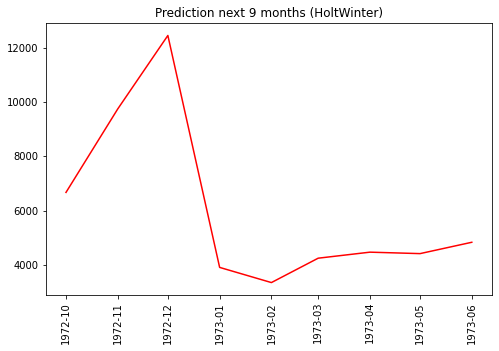

In [128]:
plt.figure(figsize=(8,5))
plt.plot(holt_predict_next_9_m, color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months (HoltWinter)")
plt.show()

## 5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months)

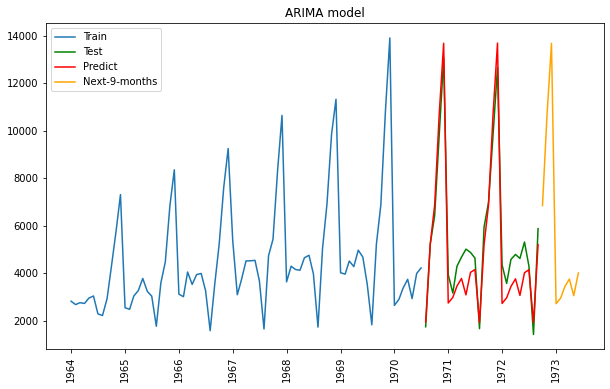

In [129]:
## ARIMA
plt.figure(figsize=(10,6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test', color = 'green')
plt.plot(future_forecast, label='Predict', color='red')
plt.plot(arima_predict_next_9_m, label='Next-9-months', color='orange')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title('ARIMA model')
plt.show()

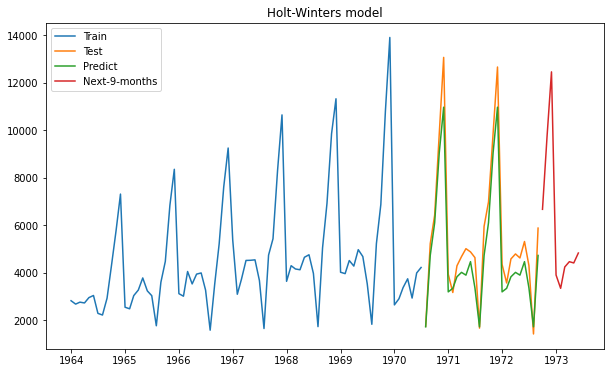

In [130]:
## HoltWinters
plt.figure(figsize=(10,6))
plt.plot(train_set.index, train_set, label='Train')
plt.plot(test_set.index, test_set, label='Test')
plt.plot(holt_pred.index, pred, label='Predict')
plt.plot(holt_predict_next_9_m, label='Next-9-months')
plt.title('Holt-Winters model')
plt.legend(loc='best')
plt.show()

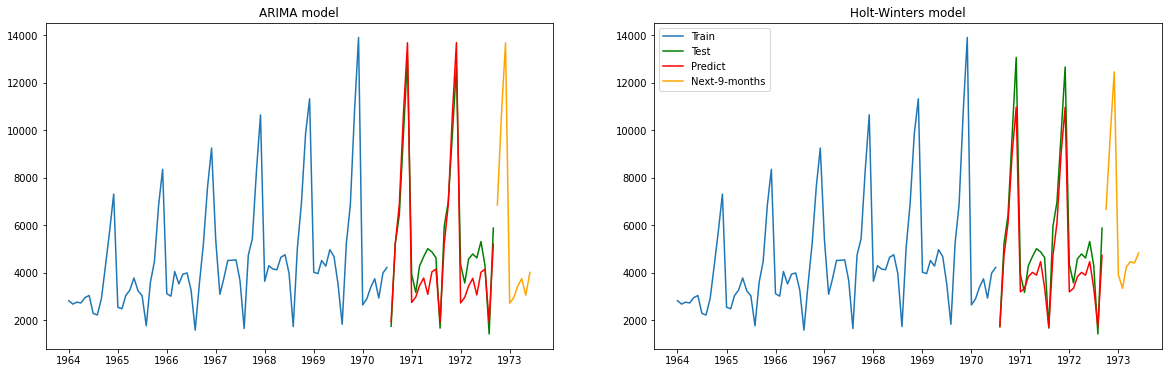

In [131]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,6))
ax[0].plot(train_set, label='Train')
ax[0].plot(test_set, label='Test', color = 'green')
ax[0].plot(future_forecast, label='Predict', color='red')
ax[0].plot(arima_predict_next_9_m, label='Next-9-months', color='orange')
ax[0].set_title('ARIMA model')
ax[1].plot(train_set, label='Train')
ax[1].plot(test_set, label='Test',color = 'green')
ax[1].plot(holt_pred.index, pred, label='Predict', color='red')
ax[1].plot(holt_predict_next_9_m, label='Next-9-months', color='orange')
ax[1].set_title('Holt-Winters model')
plt.legend(loc='best')
plt.show()

**Nhận xét:**
* Dựa vào kết quả dự đoán của 2 model ta thấy ARIMA cho kết quả dự đoán doanh số bán hàng không có sự thay đổi nhiều trong 9 tháng tiếp theo. Tuy nhiên, với HoltWinters model cho thấy doanh số dự đoán sẽ giảm trong 9 tháng tiếp theo.
* Sai số MAE và MSE của HoltWinters thấp hơn và thời gian train nhanh hơn so với ARIMA
* Cần kiểm tra model trên dữ liệu thực tế để chọn lựa model dự đoán tốt hơn